In [1]:
from wkskel import Skeleton

# Introduction to wkskel

## Scope
In very broad sense, `wkskel` represents a python library for analysis and manipulation of *undirected acyclic graphs*, throughout the package referred to as __skeletons__. In a more applied sense, these skeletons typically represent neurite center-line reconstructions obtained manually using the in-browser neurite annotation tool __webKnossos__ or generated by automated methods. 

The `wkskel` library aims at providing the data structures and methods necessary to facilitate analysis, manipulation and visualization of such skeletons in a scientific workflow. Furthermore, it provides an input-output-interface to the __.nml__ format used by *webKnossos* and other tools.

## Modules
The `wkskel` library consists of two modules: The `skeleton` module implements the `Skeleton` class, which provides all the attributes and methods required for working with skeletons. The `types` module implements some custom data types which are used to represent certain skeleton properties.

## The Skeleton class
Virtually all typical `wkskel` workflows will be centered around the `Skeleton` class. The typical entry point for such a workflow is the construction of a `skeleton` object representing an instance of this class.

Very generally speaking, the `skeleton` object both houses the data associated with and provides the methods for interacting with one or multiple unconnected, undirected acyclic graphs, called __trees__. Each tree is fundamentally represented by the `nodes` and `edges` attributes, which hold it's vertices and edges, respectively. Further tree properties are stored in the `names`, `colors`, `tree_ids` and `group_ids` attributes. Global properties of the skeleton are stored in the `groups` and `parameters` attribute.

### Construction of a skeleton object
There are two ways to construct a `skeleton` object:
1. By providing a .nml file $\rightarrow$ The `skeleton` object is populated with all the trees and additional properties  specified in the .nml file

In [2]:
# Define a path to nml file
nml_path = '../testdata/02_ref.nml'
# Construct a skeleton object by providing the file path
skel = Skeleton(nml_path)

2. By providing parameters $\rightarrow$ The `skeleton` object is empty except for the parameters provided

In [3]:
# Define skeleton parameters
nml_parameters = Skeleton.define_parameters('2017-01-12_FD0156-2', (11.24, 11.24, 32))
# Construct a empty skeleton object by providing the file path
skel_empty = Skeleton(parameters=nml_parameters)

Since it provides more data to work with, let's focus on construction option __1.__ (construction from .nml) for now, which resulted in the skeleton object `skel`:  

### Tree representation in skeleton objects
Let' see how many trees our skeleton object contains by calling it's `num_trees` method:

In [4]:
skel.num_trees()

3

Trees are implicitely represented in the skeleton object. This means, there is no attribute called trees. Instead, for each added tree it's data is appended to the tree attributes `nodes`, `edges`, `names`, `colors`, `tree_ids` and `group_ids`. Therefore, for a skeleton with $n$ trees, each of these attribute lists will be of length $n$:

In [5]:
len(skel.nodes)

3

In [6]:
len(skel.edges)

3

Hence, in order to inspect specific attribute of a particular tree, say the name of the tree with `tree_idx = 2`, we can do as follows:

In [7]:
tree_idx = 2
skel.names[tree_idx]

'bva_em'

### Attributes of skeleton objects
The `Skeleton` class contains many attributes. Below you find some very basic examples of how to interact with the most elementary attributes. For further methods and documentation consult the source and docstrings.

#### Nodes
Data associated with the vertices of a tree are stored in the nodes table (subclass of a `pandas.DataFrame`). Represented are the unique node identifier `id`, cartesian node `position` and other properties mostly relevant for webKnossos.

In [8]:
# Show top rows of nodes table
skel.nodes[tree_idx].head()

id position                      radius rotation             inVp inMag  \
              x        y      z                    x      y    z              
0  163  34459.0  33462.0  484.0  112.399994     90.0    0.0  0.0    2     3   
1  109  33376.0  37242.0  198.0  112.399994     90.0    0.0  0.0    2     3   
2  164  34490.0  33153.0  520.0  112.399994     90.0    0.0  0.0    2     3   
3  111  33020.0  37668.0  226.0  112.399994     90.0    0.0  0.0    2     3   
4  150  32985.0  36174.0  845.0  112.399994      0.0  270.0  0.0    1     3   

  bitDepth interpolation           time comment  
                                                 
0        4          True  1486472429033     NaN  
1        4          True  1486472236180     NaN  
2        4          True  1486472430409     NaN  
3        4          True  1486472239427     NaN  
4        4          True  1486472394548     NaN

In [9]:
# Get the first 5 xyz positions
skel.nodes[tree_idx]['position'][0:5]

,x,y,z
0,34459.0,33462.0,484.0
1,33376.0,37242.0,198.0
2,34490.0,33153.0,520.0
3,33020.0,37668.0,226.0
4,32985.0,36174.0,845.0


In [10]:
# Get the first 5 x positions
skel.nodes[tree_idx][('position', 'x')][0:5]

0    34459.0
1    33376.0
2    34490.0
3    33020.0
4    32985.0
Name: (position, x), dtype: float64

#### Edges
Data associated with the edges of a tree are stored in the edges `numpy` array. 

In [11]:
skel.edges[tree_idx][0:5]

array([[191, 153],
       [107, 108],
       [146, 147],
       [121, 122],
       [128, 129]])

Each row specifies an edge between two nodes with the specified `id`:

In [12]:
# Get the 11th edge specified between two node ids:
edge_idx = 10
skel.edges[tree_idx][edge_idx]

array([136, 137])

### Methods of skeleton objects
The `Skeleton` class contains many methods. Below you find some very basic usage examples to get started. For further methods and documentation consult the source and docstrings.

#### Plot
To get a visual intuition for the trees contained in our skeleton object, or to generate scientific figures, we can make use of the `Skeleton` class' `plot` method:

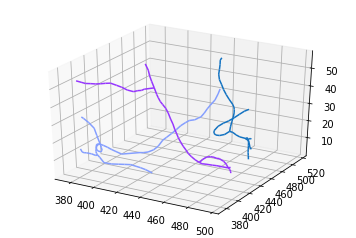

In [13]:
# Let's plot with default values (resulting in a 3d projection with micrometer scale)
skel.plot()

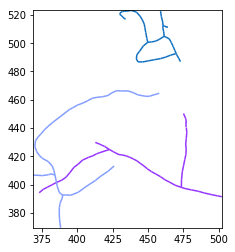

In [14]:
# We can also plot a 2d projection on the xy plane
skel.plot(view='xy')

#### Delete tree
It can be required to delete a tree from a skeleton. To do that, let's find out which trees we have contained in the skeleton object:

In [15]:
# Tree names in skeleton object before deleting tree
skel.names

['bvc_em', 'bvb_em', 'bva_em']

In [16]:
# Tree ids in skeleton object before deleting tree
skel.tree_ids

[1, 2, 3]

Let's delete the tree with id = 3:

In [17]:
# Delete tree via id
skel.delete_tree(id=3)

In [18]:
# Tree names in skeleton object after deleting tree
skel.names

['bvc_em', 'bvb_em']

In [19]:
# Tree ids in skeleton object after deleting tree
skel.tree_ids

[1, 2]

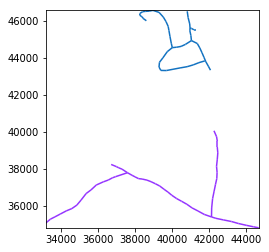

In [20]:
# Let's visualize the result in a 2d projection on the xy plane using a voxel scale instead of micrometers
skel.plot(view='xy', unit='vx')

#### Add tree
We can also add trees to a skeleton. We can do that by defining the nodes and edges of our new tree:

In [21]:
nodes = skel.define_nodes(
    position_x=[35000, 37000, 38000, 40000], 
    position_y=[40000, 41000, 44000, 42000], 
    position_z=[1000, 1100, 1200, 1000], 
    id=[1, 2, 3, 4])
edges = [
    (1, 2), 
    (2, 3), 
    (2, 4)]
skel.add_tree(nodes, edges)

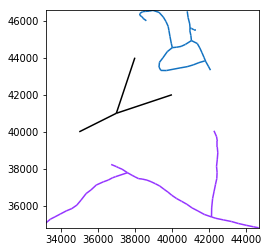

In [22]:
# Let's visualize the result in a 2d projection on the xy plane using a voxel scale instead of micrometers
skel.plot(view='xy', unit='vx')

#### Add tree (from existing skeleton)
Alternatively, we can add a tree from another skeleton object

In [23]:
nml_path_add = '../testdata/01_ref.nml'
tree_idx_add = 6
skel.add_tree_from_skel(Skeleton(nml_path_add), tree_idx_add)

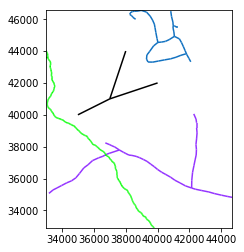

In [24]:
# Let's visualize the result in a 2d projection on the xy plane using a voxel scale instead of micrometers
skel.plot(view='xy', unit='vx')

#### Write skeleton to nml
Finally, we can write the modified skeleton to an .nml file which can be opened by webKnossos

In [25]:
nml_path_out = 'getting_started.nml'
skel.write_nml(nml_path_out)